# OBJECTIVE

## To analyse whether the mushrooms present in the dataframe is edible or poisonous by analysing the various factors of the mushrooms.

## Importing Neccessary Libraries

In [179]:
import    math
import    numpy                   as       np
import    pandas                  as       pd
import    seaborn                 as       sns
import    tensorflow             as       tf
import    matplotlib.pyplot  as       plt
from      keras              import   layers
from      sklearn           import   tree
from      keras              import   models
from      sklearn           import   metrics
from      sklearn.svm    import   SVC
from      tensorflow      import   keras
from      sklearn                     import   linear_model
from      sklearn.metrics        import   f1_score
from      sklearn.metrics        import   roc_curve, auc
from      sklearn.metrics        import   accuracy_score
from      sklearn.naive_bayes   import   GaussianNB
from      sklearn.metrics           import   confusion_matrix
from      sklearn.metrics           import   classification_report
from      sklearn.preprocessing      import   LabelEncoder
from      sklearn.model_selection   import   train_test_split
from      sklearn.neighbors             import   KNeighborsClassifier
from      sklearn.model_selection   import   cross_val_score

## Reading the data

In [180]:
df = pd.read_csv( "C:\\Users\\Vijay Ananth\\OneDrive\\Desktop\\Machine Learning (FA)\\mushrooms.csv" )

## Viewing the first 5 rows of the dataframe

In [181]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Encoding (converting) all the values into numbers

In [182]:
lb = LabelEncoder()
df = df.apply(lb.fit_transform)
df.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


## Viewing the last 5 rows of the dataframe

In [183]:
df.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2
8123,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,4,1,2


## Viewing the dimensions (number of rows and columns) of the dataframe

In [184]:
df.shape

(8124, 23)

## Viewing the names of the columns in the dataframe

In [185]:
df.keys()

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

## Viewing the types of data present in the dataframe

In [186]:
df.dtypes

class                       int32
cap-shape                   int32
cap-surface                 int32
cap-color                   int32
bruises                     int32
odor                        int32
gill-attachment             int32
gill-spacing                int32
gill-size                   int32
gill-color                  int32
stalk-shape                 int32
stalk-root                  int32
stalk-surface-above-ring    int32
stalk-surface-below-ring    int32
stalk-color-above-ring      int32
stalk-color-below-ring      int32
veil-type                   int32
veil-color                  int32
ring-number                 int32
ring-type                   int32
spore-print-color           int32
population                  int32
habitat                     int32
dtype: object

## Checking whether there are any empty values present in the dataframe

In [187]:
df.isnull().any()

class                       False
cap-shape                   False
cap-surface                 False
cap-color                   False
bruises                     False
odor                        False
gill-attachment             False
gill-spacing                False
gill-size                   False
gill-color                  False
stalk-shape                 False
stalk-root                  False
stalk-surface-above-ring    False
stalk-surface-below-ring    False
stalk-color-above-ring      False
stalk-color-below-ring      False
veil-type                   False
veil-color                  False
ring-number                 False
ring-type                   False
spore-print-color           False
population                  False
habitat                     False
dtype: bool

## Viewing the number of unique values present in each column in the dataframe

In [188]:
df.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

## Viewing the overall information in the dataframe

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int32
 1   cap-shape                 8124 non-null   int32
 2   cap-surface               8124 non-null   int32
 3   cap-color                 8124 non-null   int32
 4   bruises                   8124 non-null   int32
 5   odor                      8124 non-null   int32
 6   gill-attachment           8124 non-null   int32
 7   gill-spacing              8124 non-null   int32
 8   gill-size                 8124 non-null   int32
 9   gill-color                8124 non-null   int32
 10  stalk-shape               8124 non-null   int32
 11  stalk-root                8124 non-null   int32
 12  stalk-surface-above-ring  8124 non-null   int32
 13  stalk-surface-below-ring  8124 non-null   int32
 14  stalk-color-above-ring    8124 non-null 

## Viewing the statistical values like count, mean, standard deviation,
minimum, maximum present in the dataframe

In [190]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


## Normalization of the dataframe

In [191]:
df.skew

<bound method DataFrame.skew of       class  cap-shape  cap-surface  cap-color  bruises  odor  \
0         1          5            2          4        1     6   
1         0          5            2          9        1     0   
2         0          0            2          8        1     3   
3         1          5            3          8        1     6   
4         0          5            2          3        0     5   
...     ...        ...          ...        ...      ...   ...   
8119      0          3            2          4        0     5   
8120      0          5            2          4        0     5   
8121      0          2            2          4        0     5   
8122      1          3            3          4        0     8   
8123      0          5            2          4        0     5   

      gill-attachment  gill-spacing  gill-size  gill-color  ...  \
0                   1             0          1           4  ...   
1                   1             0          0       

## Visualising the missing data in the dataframe

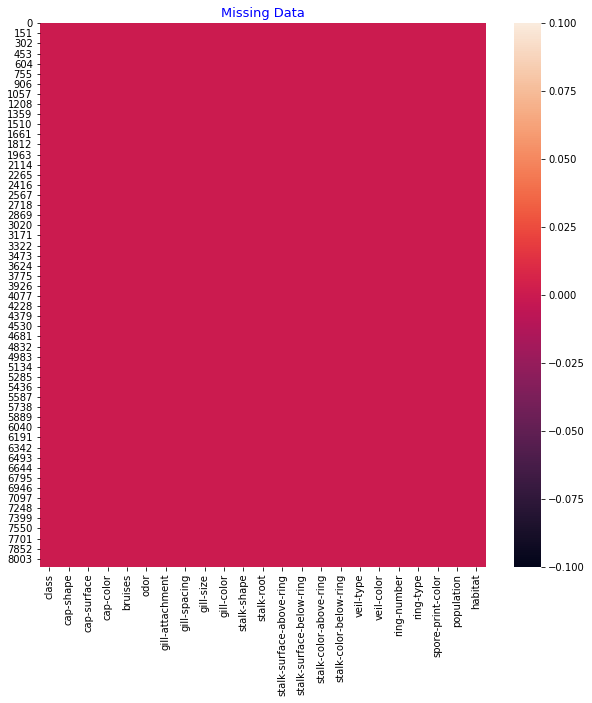

In [192]:
plt.figure(figsize = (10,10))
sns.heatmap(df.isnull())
sns.color_palette("mako")
plt.title("Missing Data",fontsize=(13),color="blue")
plt.show()

## Visualising the number of edible and poisonous mushrooms present in the dataframe

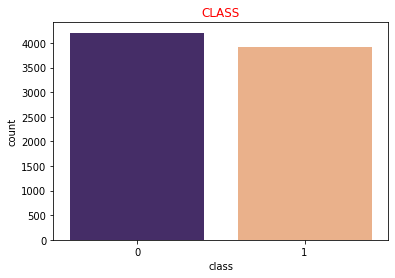

In [193]:
sns.countplot(x = df['class'], palette=['#432371',"#FAAE7B"]);
plt.title("CLASS",color = "red")
plt.show()

## Visualising the whole dataframe in terms of statistical values

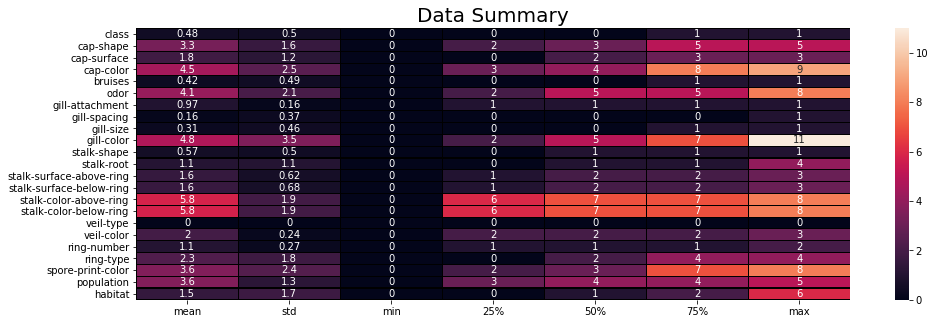

In [194]:
plt.figure(figsize = (16,5))
sns.heatmap(df.describe()[1:].transpose(),annot=True,linewidths=.10,linecolor="black")
sns.color_palette("rocket")
plt.title("Data Summary",fontsize=(20),color="Black")
plt.show()

## Pie chart between the number of edible mushrooms and poisonous mushrooms

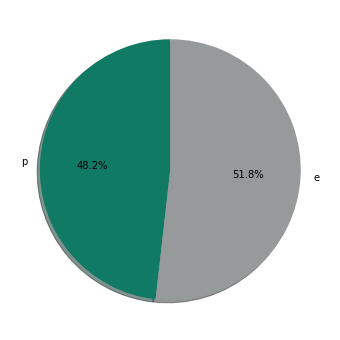

In [195]:
p = len(df[df['class'] == 1])
e = len(df[df['class'] == 0])
plt.figure(figsize=(8,6))
labels = 'p','e'
sizes = [p,e]
colors = ['#117a65', '#979a9a']
plt.pie(sizes, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

## Visualising different habitat of mushrooms

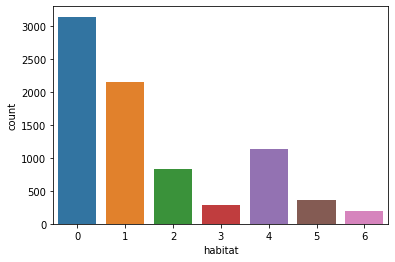

In [196]:
sns.countplot(df['habitat'])
plt.show()

## Visualising different cap-surface of mushrooms

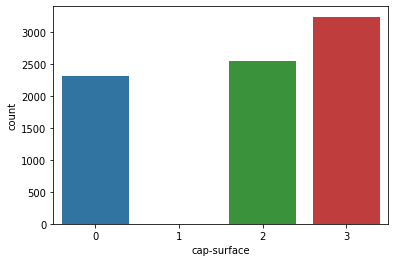

In [197]:
sns.countplot(df["cap-surface"])
plt.show()

## Visualising different stalk-root of mushrooms

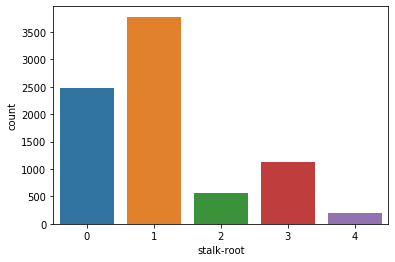

In [198]:
sns.countplot(df["stalk-root"])
plt.show()

## Visualising the distribution of cap-shape in the dataframe

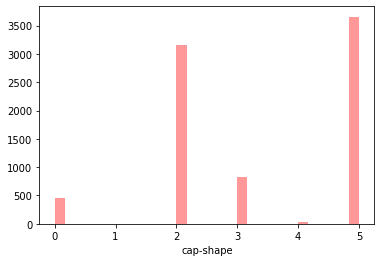

In [199]:
sns.distplot(df["cap-shape"],kde=False,bins=30,color="red")
plt.show()

## Visualising the distribution of cap-surface in the dataframe

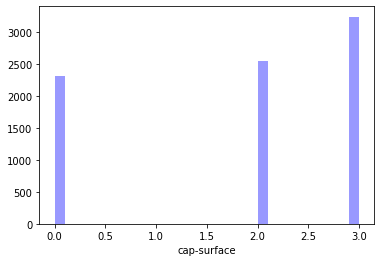

In [200]:
sns.distplot(df["cap-surface"],kde=False,bins=30,color="blue")
plt.show()

## Visualising the distribution of odor in the dataframe

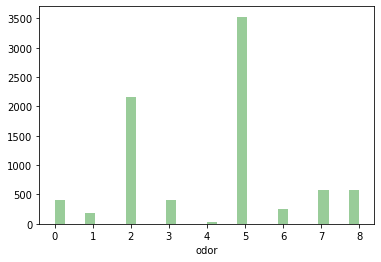

In [201]:
sns.distplot(df["odor"],kde=False,bins=30,color="green")
plt.show()


## Visualising the distribution of cap-coloring the dataframe

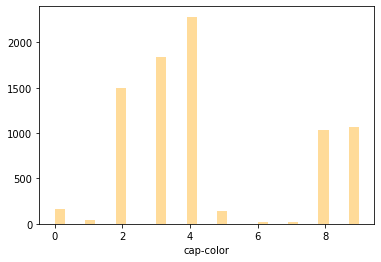

In [202]:
sns.distplot(df["cap-color"],kde=False,bins=30,color="orange")
plt.show()

## Visualising the probability distribution of class in the dataframe

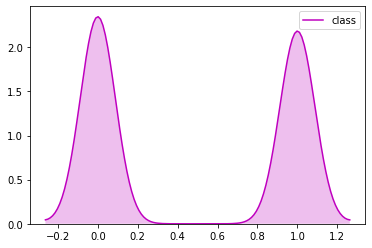

In [209]:
sns.kdeplot(df["class"],shade=True, color="m")
plt.show()

## Visualising the count of different cap-surface in the dataframe

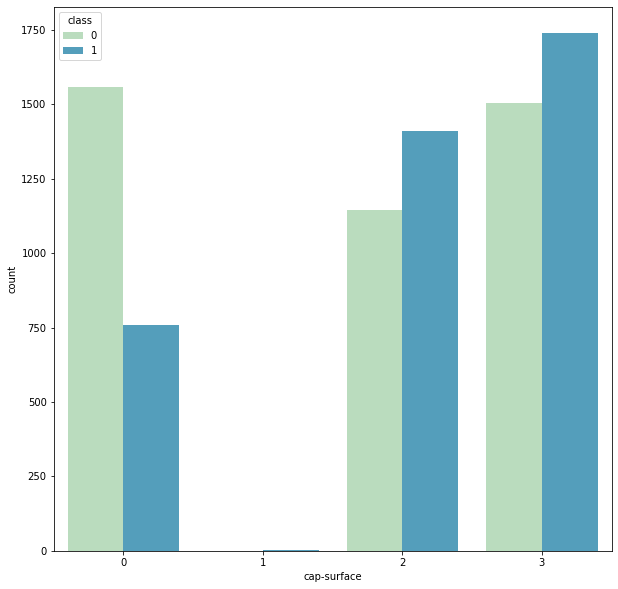

In [210]:
plt.figure(figsize=(10,10))
sns.countplot(x="cap-surface",data = df ,hue = "class", palette="GnBu")
plt.show()

## Visualising the meaan of different factors of the mushroom present
in the dataframe

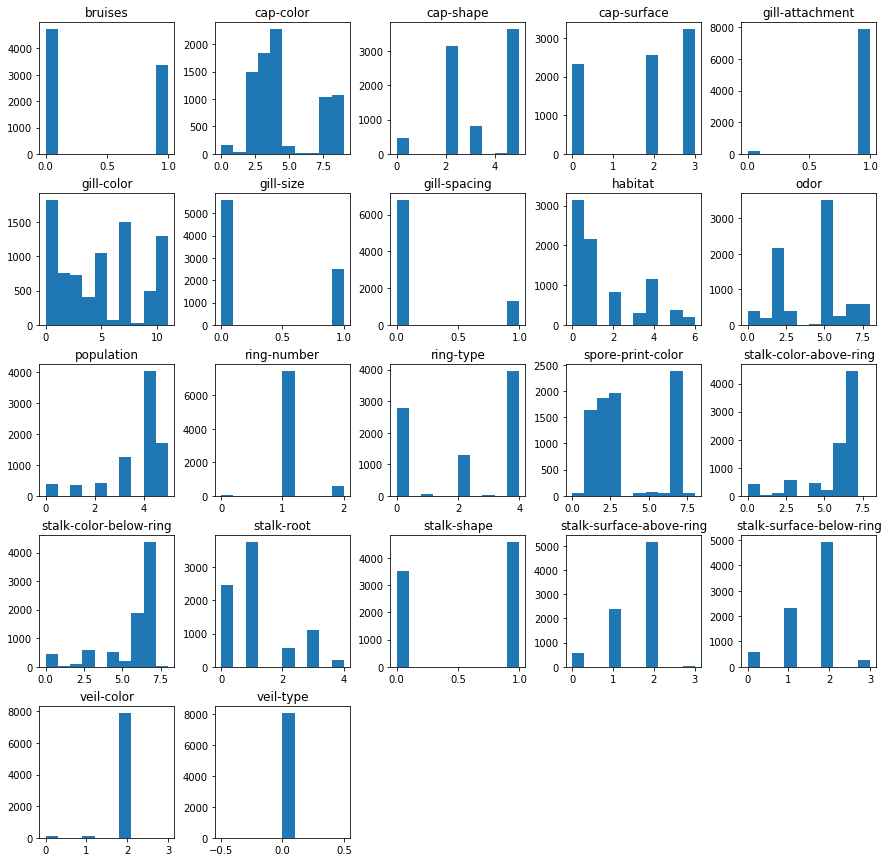

In [168]:
mean= df.iloc[:,1:23]
histogram_mean = mean.hist(bins=10, figsize=(15, 15), grid=False,)

## Creating a separate variable for the class to feed it into the ML algorithm

In [169]:
y = df['class']

## Since the class is the label of the data that needs to be predicted it is dropped

In [170]:
df = df.drop(['class'],axis=1)

## Splitting the data into 80% and 20% so that some data can be used to test the ML model

In [171]:
train_x,test_x,train_y,test_y = train_test_split(df,y,test_size = 0.20)

## Feeding the data into KNN algorithm

In [174]:
ideal_n = math.sqrt(len(y))
classifier_KNN = KNeighborsClassifier(n_neighbors = int(ideal_n), p = 2, metric = 'euclidean')
classifier_KNN.fit(train_x,train_y)
test_arr = classifier_KNN.predict(test_x)

## Analysing the results of the KNN model

In [176]:
print(classification_report(test_y,test_arr))
print(classifier_KNN.score(test_x,test_y))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       860
           1       0.99      0.93      0.96       765

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625

0.9612307692307692


## Analysing the True Positives(TP), False Positives(FP),True Negative(TN), False Negative(FN) predictions of the KNN algorithm

In [103]:
print(confusion_matrix(test_y,test_arr))

[[829   8]
 [ 66 722]]


## Cross validating the ML algorithm in order to analyse the underfitting or overfitting factor of the algorithm

In [177]:
validation_score = cross_val_score(classifier_KNN, df, y, cv=10, scoring='accuracy')
print(validation_score)
print(validation_score.mean())

0.9133510867128376


## Visualising the accuracy of the algorithm using ROC Curve and analysing the ROC curve

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       837
           1       0.99      0.92      0.95       788

    accuracy                           0.95      1625
   macro avg       0.96      0.95      0.95      1625
weighted avg       0.96      0.95      0.95      1625

0.9533428548902595
0.9533428548902595


Text(0.5, 0, 'False Positive Rate')

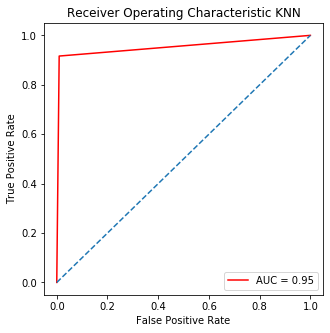

In [105]:
auc_roc = metrics.classification_report(test_y,test_arr)
print(auc_roc)
auc_roc = metrics.roc_auc_score(test_y,test_arr)
print(auc_roc)
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y, test_arr)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic KNN')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

## Feeding the data into Decision Tree algorithm

In [106]:
tree_model = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
tree_model.fit(train_x,train_y)
test_arr = tree_model.predict(test_x)
print(tree_model.score(test_x,test_y))

1.0


## Analysing the results of the Decision Tree model

In [107]:
validation_score = cross_val_score(tree_model, df, y, cv=10, scoring='accuracy')
print(validation_score)
print(validation_score.mean())

[0.68511685 1.         1.         1.         1.         1.
 1.         1.         0.97044335 1.        ]
0.9655560200922206


## Analysing the True Positives(TP), False Positives(FP),
True Negative(TN), False Negative(FN) predictions
of the Decision Tree algorithm

In [108]:
print(confusion_matrix(test_y,test_arr))

[[837   0]
 [  0 788]]


## Cross validating the ML algorithm in order to analyse the underfitting
or overfitting factor of the algorithm

In [109]:
validation_score = cross_val_score(tree_model, df, y, cv=10, scoring='accuracy')
print(validation_score)
print(validation_score.mean())

[0.68511685 1.         1.         1.         1.         1.
 1.         1.         0.97044335 1.        ]
0.9655560200922206


## Visualising the accuracy of the algorithm using ROC Curve and analysing the ROC curve

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       837
           1       1.00      1.00      1.00       788

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

1.0
1.0


Text(0.5, 0, 'False Positive Rate')

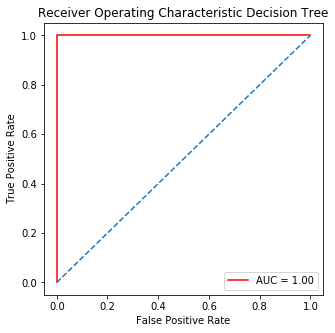

In [110]:
auc_roc = metrics.classification_report(test_y,test_arr)
print(auc_roc)
auc_roc = metrics.roc_auc_score(test_y,test_arr)
print(auc_roc)
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y, test_arr)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic Decision Tree')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

## Feeding the data into Support Vector Machines algorithm

In [111]:
svm = SVC()
svm.fit(train_x,train_y)
test_arr = svm.predict(test_x)
print(svm.score(test_x,test_y))

0.9895384615384616


## Analysing the results of the Support Vector Machines model

In [112]:
validation_score = cross_val_score(svm, df, y, cv=10, scoring='accuracy')
print(validation_score)
print(validation_score.mean())

[0.67773678 0.98646986 0.99753998 0.99261993 0.94704433 0.93226601
 1.         1.         0.64901478 0.98891626]
0.9171607922975781


## Analysing the True Positives(TP), False Positives(FP), True Negative(TN), False Negative(FN) predictions of the Support Vector Machines algorithm

In [113]:
print(confusion_matrix(test_y,test_arr))


[[836   1]
 [ 16 772]]


## Visualising the accuracy of the algorithm using ROC Curve and analysing the ROC curve

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       837
           1       1.00      0.98      0.99       788

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

0.9892503441709269
0.9892503441709269


Text(0.5, 0, 'False Positive Rate')

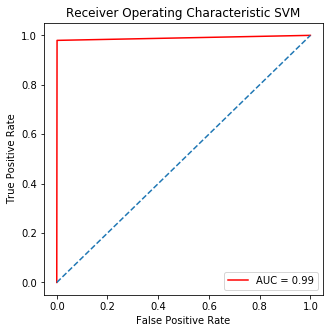

In [114]:
auc_roc = metrics.classification_report(test_y,test_arr)
print(auc_roc)
auc_roc = metrics.roc_auc_score(test_y,test_arr)
print(auc_roc)
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y, test_arr)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic SVM')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

## Feeding the data into Gaussian Naive Bayes algorithm

In [115]:
nb = GaussianNB()
nb.fit(train_x,train_y)
test_arr = nb.predict(test_x)
print(nb.score(test_x,test_y))

0.9150769230769231


## Analysing the results of the Gaussian Naive Bayes model

In [116]:
validation_score = cross_val_score(nb, df, y, cv=10, scoring='accuracy')
print(validation_score)
print(validation_score.mean())

[0.59778598 0.78843788 0.97908979 0.9803198  0.84852217 0.81773399
 0.8091133  0.81650246 0.85098522 0.97536946]
0.8463860057319785


## Analysing the True Positives(TP), False Positives(FP),
True Negative(TN), False Negative(FN) predictions
of the Gaussian Naives Bayes algorithm

In [117]:
print(confusion_matrix(test_y,test_arr))

[[763  74]
 [ 64 724]]


## Visualising the accuracy of the algorithm using ROC Curve and analysing the ROC curve

              precision    recall  f1-score   support

           0       0.92      0.91      0.92       837
           1       0.91      0.92      0.91       788

    accuracy                           0.92      1625
   macro avg       0.91      0.92      0.92      1625
weighted avg       0.92      0.92      0.92      1625

0.9151853671257634
0.9151853671257634


Text(0.5, 0, 'False Positive Rate')

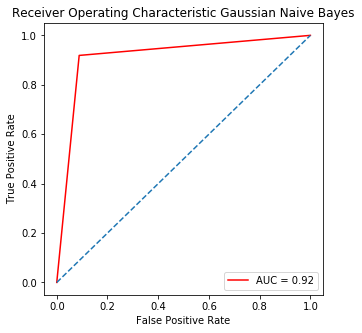

In [118]:
auc_roc = metrics.classification_report(test_y,test_arr)
print(auc_roc)
auc_roc = metrics.roc_auc_score(test_y,test_arr)
print(auc_roc)
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y, test_arr)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)
plt.figure(figsize = (5,5))
plt.title('Receiver Operating Characteristic Gaussian Naive Bayes')
plt.plot(false_positive_rate,true_positive_rate, color = 'red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

## Feeding the data into Linear Regression algorithm

In [119]:
lr = linear_model.LinearRegression()
lr.fit(train_x,train_y)
test_arr = lr.predict(test_x)
print(lr.score(test_x,test_y))

0.7016051179936329


## Analysing the results of the Linear Regression model

In [120]:
validation_score = cross_val_score(lr, df, y, cv=10, scoring='r2')
print(validation_score)
print(validation_score.mean())

[-1.76613986  0.29153889  0.45827811  0.77454577  0.82031756  0.50052882
 -0.59364981 -0.14377589  0.81147595  0.76989287]
0.19230124219622569


## Visualising the accuracy of the algorithm using ROC Curve and analysing the ROC curve

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       837
           1       0.95      0.92      0.93       788

    accuracy                           0.94      1625
   macro avg       0.94      0.94      0.94      1625
weighted avg       0.94      0.94      0.94      1625

0.9551198078707493
0.9551198078707493


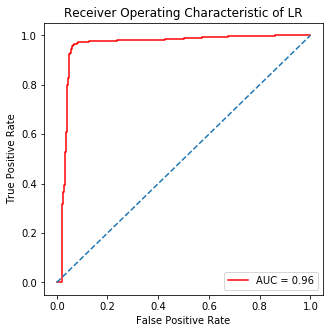

In [121]:
auc_roc = metrics.classification_report(test_y,test_arr.round())
print(auc_roc)
auc_roc = metrics.roc_auc_score(test_y,test_arr)
print(auc_roc)
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y, test_arr)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)
plt.figure(figsize=(5,5))
plt.title('Receiver Operating Characteristic of LR')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Intialising and Creating the neural network keras model

In [122]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_dim=train_x.shape[1]))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

## Compiling the keras model

In [123]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

## Fitting the model or feeding the model with the neccessary data

In [124]:
history = model.fit(train_x, train_y, epochs=20, validation_data=(test_x, test_y))

Epoch 1/20
204/204 [==============================] - 1s 4ms/step - loss: 0.4185 - accuracy: 0.8264 - val_loss: 0.3687 - val_accuracy: 0.8665
Epoch 2/20
204/204 [==============================] - 1s 3ms/step - loss: 0.3011 - accuracy: 0.9008 - val_loss: 0.3099 - val_accuracy: 0.8978
Epoch 3/20
204/204 [==============================] - 1s 3ms/step - loss: 0.2495 - accuracy: 0.9175 - val_loss: 0.2769 - val_accuracy: 0.8997
Epoch 4/20
204/204 [==============================] - 1s 3ms/step - loss: 0.2170 - accuracy: 0.9220 - val_loss: 0.2460 - val_accuracy: 0.9077
Epoch 5/20
204/204 [==============================] - 1s 5ms/step - loss: 0.1901 - accuracy: 0.9337 - val_loss: 0.2215 - val_accuracy: 0.9182
Epoch 6/20
204/204 [==============================] - 1s 3ms/step - loss: 0.1656 - accuracy: 0.9443 - val_loss: 0.2110 - val_accuracy: 0.9366
Epoch 7/20
204/204 [==============================] - 1s 3ms/step - loss: 0.1419 - accuracy: 0.9531 - val_loss: 0.1694 - val_accuracy: 0.9360
Epoch 

## Analysing the accuracy of the keras model

In [125]:
average_score = history.history['accuracy']
mean = sum(average_score)/len(average_score)
print(mean)

0.9610940098762513


## Visualising the accuracy and also the loss of data of the keras model to analyse whether the model is underfitting, overfitting or balanced

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


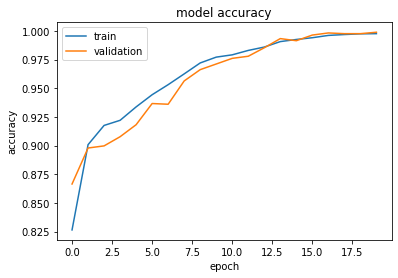

In [126]:
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Visualising the loss of data of the keras model to analyse whether the model is underfitting, overfitting or balanced

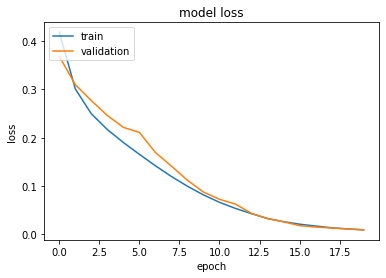

In [127]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
